<a href="https://colab.research.google.com/github/peterpavan/Walmart-Sales-Data-Analysis-using-business-problem/blob/main/Walmart_Sales_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_excel('/content/drive/MyDrive/Walmart Sales.xlsx')
df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Date,Time,Payment,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,1/5/2019,13:08:00,Ewallet,9.1
1,226-31-3081,A,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3/8/2019,10:29:00,Cash,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,3/3/2019,13:23:00,Credit card,7.4
3,123-19-1176,B,Yangon,Member,Male,Health and beauty,58.22,8,1/27/2019,20:33:00,Ewallet,8.4
4,373-73-7910,C,Yangon,Normal,Male,Sports and travel,86.31,7,2/8/2019,10:37:00,Ewallet,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,A,Naypyitaw,Normal,Male,Health and beauty,40.35,1,1/29/2019,13:46:00,Ewallet,6.2
996,303-96-2227,A,Mandalay,Normal,Female,Home and lifestyle,97.38,10,3/2/2019,17:16:00,Ewallet,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,2/9/2019,13:22:00,Cash,7.7
998,347-56-2442,B,Yangon,Normal,Male,Home and lifestyle,65.82,1,2/22/2019,15:33:00,Cash,4.1


In [ ]:
df.describe()

,Unit price,Quantity,Rating
count,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,6.97270
std,26.494628,2.923431,1.71858
min,10.080000,1.000000,4.00000
25%,32.875000,3.000000,5.50000
50%,55.230000,5.000000,7.00000
75%,77.935000,8.000000,8.50000
max,99.960000,10.000000,10.00000


In [ ]:
df.isna().sum()

Invoice ID       0
Branch           0
City             0
Customer type    0
Gender           0
Product line     0
Unit price       0
Quantity         0
Date             0
Time             0
Payment          0
Rating           0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Invoice ID     1000 non-null   object 
 1   Branch         1000 non-null   object 
 2   City           1000 non-null   object 
 3   Customer type  1000 non-null   object 
 4   Gender         1000 non-null   object 
 5   Product line   1000 non-null   object 
 6   Unit price     1000 non-null   float64
 7   Quantity       1000 non-null   int64  
 8   Date           1000 non-null   object 
 9   Time           1000 non-null   object 
 10  Payment        1000 non-null   object 
 11  Rating         1000 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 93.9+ KB


# **Adding Sales and Revenue column**

In [ ]:
df['Sales'] = df['Unit price'] * df['Quantity']
df['Revenue'] = df['Sales'].sum()
df.inplace = True

df.head(5)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Date,Time,Payment,Rating,Sales,Revenue
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,1/5/2019,13:08:00,Ewallet,9.1,522.83,307587.38
1,226-31-3081,A,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3/8/2019,10:29:00,Cash,9.6,76.40,307587.38
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,3/3/2019,13:23:00,Credit card,7.4,324.31,307587.38
3,123-19-1176,B,Yangon,Member,Male,Health and beauty,58.22,8,1/27/2019,20:33:00,Ewallet,8.4,465.76,307587.38
4,373-73-7910,C,Yangon,Normal,Male,Sports and travel,86.31,7,2/8/2019,10:37:00,Ewallet,5.3,604.17,307587.38


**City level Sales and Revenue Performance**

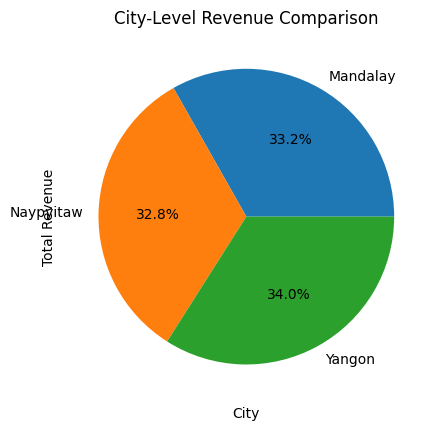

In [ ]:
city_revenue.plot(kind='pie', autopct='%1.1f%%')
plt.title('City-Level Revenue Comparison')
plt.xlabel('City')
plt.ylabel('Total Revenue')
plt.show()

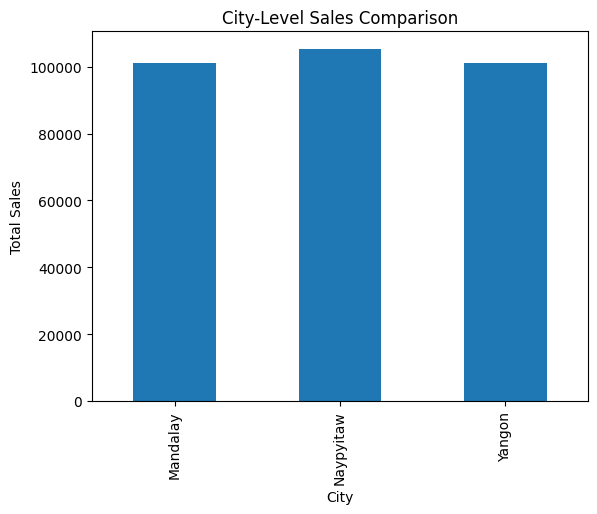

In [ ]:
city_sales.plot(kind='bar')
plt.title('City-Level Sales Comparison')
plt.xlabel('City')
plt.ylabel('Total Sales')
plt.show()

**Branch level Sales and Revenue Performance**

In [ ]:
city_branch_data = df.groupby(['City', 'Branch'])['Sales', 'Revenue'].sum()
city_branch_data

<ipython-input-44-48acab42641f>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  city_branch_data = df.groupby(['City', 'Branch'])['Sales', 'Revenue'].sum()


Sales      Revenue
City      Branch                       
Mandalay  A       34130.09  36602898.22
          B       37215.93  36295310.84
          C       29794.62  29220801.10
Naypyitaw A       35985.64  33834611.80
          B       35157.75  33527024.42
          C       34160.14  33527024.42
Yangon    A       33647.27  35064961.32
          B       35193.51  34757373.94
          C       32302.43  34757373.94

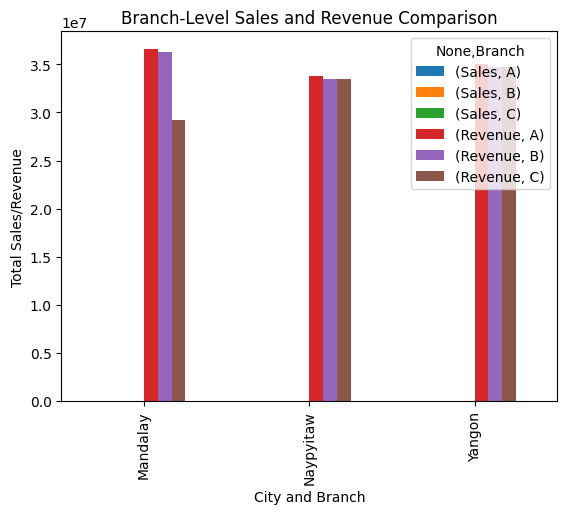

In [ ]:
city_branch_data.unstack(level=1).plot(kind='bar')
plt.title('Branch-Level Sales and Revenue Comparison')
plt.xlabel('City and Branch')
plt.ylabel('Total Sales/Revenue')
plt.show()

In [ ]:
avg_price = city_branch_data['Unit price'].mean().
avg_price.index = avg_price.index.set_names(['City', 'Branch'])
print(avg_price)

City       Branch
Mandalay   A         53.353866
           B         56.133305
           C         57.958316
Naypyitaw  A         54.123182
           B         57.785688
           C         57.941009
Yangon     A         55.639298
           B         56.011062
           C         52.684602
Name: avgprice, dtype: float64


In [ ]:
df['Month'] = pd.to_datetime(df['Date']).dt.month

In [ ]:
monthly_sales = df.groupby('Month')['Sales'].sum()
monthly_revenue = df.groupby('Month')['Revenue'].sum()
monthly_sales
monthly_revenue

Month
1    1.082708e+08
2    9.319898e+07
3    1.061176e+08
Name: Revenue, dtype: float64

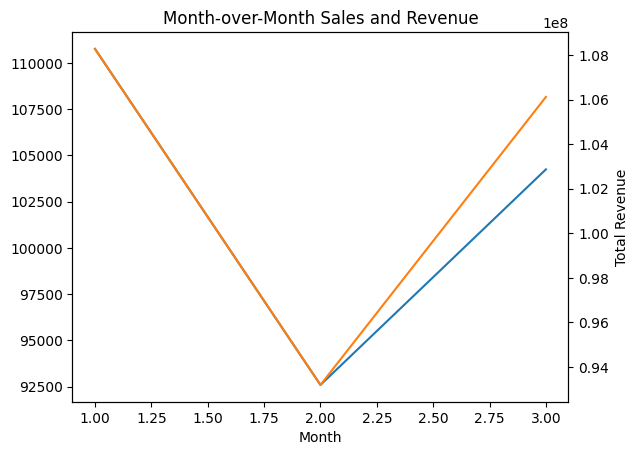

In [ ]:
monthly_sales.plot(kind='line', label='Sales')
monthly_revenue.plot(kind='line', label='Revenue', secondary_y=True)
plt.title('Month-over-Month Sales and Revenue')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.ylabel('Total Revenue')
plt.show()

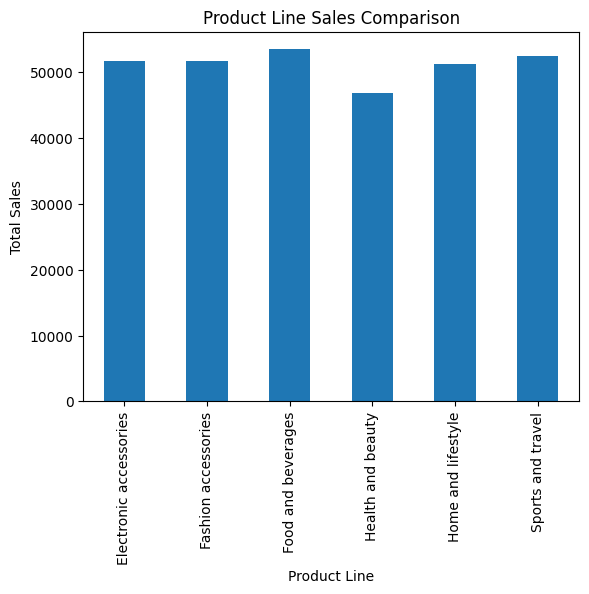

In [ ]:
product_line_sales = df.groupby('Product line')['Sales'].sum()
product_line_revenue = df.groupby('Product line')['Revenue'].sum()
product_line_sales.plot(kind='bar')
plt.title('Product Line Sales Comparison')
plt.xlabel('Product Line')
plt.ylabel('Total Sales')
plt.show()

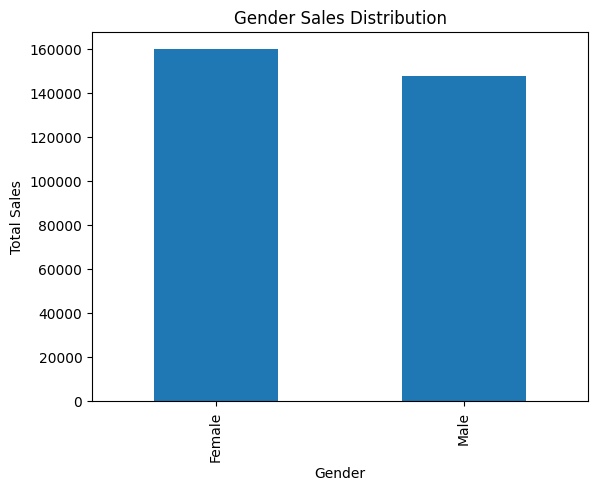

In [ ]:
gender_sales = df.groupby('Gender')['Sales'].sum()
gender_revenue = df.groupby('Gender')['Revenue'].sum()
gender_sales.plot(kind='bar')
plt.title('Gender Sales Distribution')
plt.xlabel('Gender')
plt.ylabel('Total Sales')
plt.show()
